In [51]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [52]:
## Nome dos paths onse estão salvos e vamos salvar os dados processados
PATH_DADOS_PROCESSADOS = '../dados/e_sus_processados/' # Nome do path a salvar os arquivos
PATH_MUNICIPIOS = '../dados/processados/'
PATH_ESTADO = '../dados/municipios/'
PATH_FIGURAS = '../figure/'

FILES_ESTADOS = os.listdir(PATH_DADOS_PROCESSADOS)
FILENAME_MUNICIPIOS = 'municipios_processada.csv'
FILENAME_ESTADO = 'estados_processada.csv'

dfMunicipios = pd.read_csv(PATH_MUNICIPIOS + FILENAME_MUNICIPIOS, encoding='utf-8', delimiter=';')
dfEstado = pd.read_csv(PATH_ESTADO + FILENAME_ESTADO, encoding='utf-8', delimiter=';')

cols = ['dataNotificacao', 'sexo', 'idade', 'estado_normalizado', 'municipio_normalizado', 'extractDate', 'idadeTrunc']

dflist = []

for file in FILES_ESTADOS:
    dfLoad = pd.read_csv(PATH_DADOS_PROCESSADOS + file, encoding='utf-8', delimiter=';', compression='zip')
    dfLoad = dfLoad[[c for c in dfLoad.columns if c in cols]]
    dflist.append(dfLoad.copy())
    
    print(f'Lido csv {file}')

dfProc = pd.concat(dflist).dropna(how='any',axis=0)

Lido csv rr_sus_processados.csv
Lido csv ba_sus_processados.csv
Lido csv es_sus_processados.csv
Lido csv df_sus_processados.csv
Lido csv rj_sus_processados.csv
Lido csv ma_sus_processados.csv
Lido csv mg_sus_processados.csv
Lido csv sc_sus_processados.csv
Lido csv pe_sus_processados.csv
Lido csv ro_sus_processados.csv
Lido csv pi_sus_processados.csv
Lido csv se_sus_processados.csv
Lido csv go_sus_processados.csv
Lido csv rn_sus_processados.csv
Lido csv pr_sus_processados.csv
Lido csv pa_sus_processados.csv
Lido csv am_sus_processados.csv
Lido csv pb_sus_processados.csv
Lido csv al_sus_processados.csv
Lido csv ac_sus_processados.csv
Lido csv mt_sus_processados.csv
Lido csv ce_sus_processados.csv
Lido csv to_sus_processados.csv
Lido csv sp_sus_processados.csv
Lido csv rs_sus_processados.csv


In [53]:
dfProc.count()

dataNotificacao          5540139
sexo                     5540139
idade                    5540139
estado_normalizado       5540139
municipio_normalizado    5540139
extractDate              5540139
idadeTrunc               5540139
dtype: int64

A base com a populacao dividida em faixa etária é tratada para que numa mesma coluna fiquem o população total, segmentada pelo estado e pela faixa etária a qual pertencem

In [54]:
###################
# dfEstado
###################

cols_sel = ['uf', 
            'estado_normalizado']
dfEstado = dfEstado.reset_index()
dfEstado = dfEstado[cols_sel].set_index('uf')
dfEstado

,estado_normalizado
uf,
RO,rondonia
AC,acre
AM,amazonas
RR,roraima
PA,para
AP,amapa
TO,tocantins
MA,maranhao
PI,piaui


In [55]:
###################
# df dos Municipios
###################

cols_sel = ['codigo_ibge', 
            'municipioNormalizado', 
            'codigo_uf', 
            'uf', 
            'estado', 
            'densidade_populacional', 
            'area_mun', 
            'populacao_estimada']
dfMunicipios = dfMunicipios[cols_sel].set_index('uf')

In [56]:
###################
# Cruzamento dos municipios com dfEstado para trazer densidade populacional por estado
###################
dfEstado = (dfMunicipios.join(dfEstado, on = ['uf'])
            .rename(columns= {'municipioNormalizado' : 'municipio_normalizado'})
            .reset_index().set_index(['estado_normalizado', 'municipio_normalizado'])
           )

In [57]:
dfEstado

,,uf,codigo_ibge,codigo_uf,estado,densidade_populacional,area_mun,populacao_estimada
estado_normalizado,municipio_normalizado,,,,,,,
goias,abadia de goias,GO,5200050,52,Goiás,60.832835,147.256,8958
minas gerais,abadia dos dourados,MG,3100104,31,Minas Gerais,7.951749,881.064,7006
goias,abadiania,GO,5200100,52,Goiás,19.577525,1045.127,20461
minas gerais,abaete,MG,3100203,31,Minas Gerais,12.795345,1817.067,23250
para,abaetetuba,PA,1500107,15,Pará,98.767456,1610.652,159080
...,...,...,...,...,...,...,...,...
bahia,xique-xique,BA,2933604,29,Bahia,9.158680,5079.662,46523
paraiba,zabele,PB,2517407,25,Paraíba,21.112058,106.811,2255
sao paulo,zacarias,SP,3557154,35,São Paulo,8.625445,319.056,2752


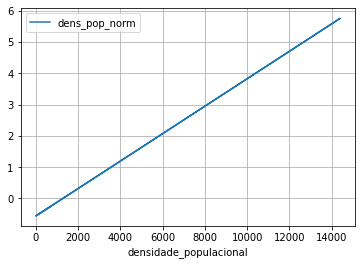

In [58]:
###################
# calcular com a densidade populacional por estado
###################

dfDensEstado = dfEstado[['area_mun', 'populacao_estimada', 'densidade_populacional']].copy()
dfDensEstado = dfDensEstado.loc[dfDensEstado['populacao_estimada'] > 100000]

dfDensEstado['dens_pop_norm'] = (dfDensEstado['densidade_populacional']-dfDensEstado['densidade_populacional'].mean())/dfDensEstado['densidade_populacional'].std()
dfDensEstado['pop_est_norm'] = (dfDensEstado['populacao_estimada']-dfDensEstado['populacao_estimada'].mean())/dfDensEstado['populacao_estimada'].std()


dfDensEstado.plot(x = 'densidade_populacional', y = 'dens_pop_norm')
plt.grid()

In [59]:
###################
# Tratamento do df com os casos de Covid
###################

dfIdadeEstado = (dfProc[['extractDate', 'estado_normalizado', 'municipio_normalizado']].copy()
                 .reset_index(drop=True)
                 .set_index(['estado_normalizado', 'municipio_normalizado']))

In [60]:
dfIdadeEstado

extractDate
estado_normalizado municipio_normalizado            
roraima            boa vista              2020-07-02
                   boa vista              2020-07-03
                   boa vista              2020-07-01
                   boa vista              2020-06-12
                   boa vista              2020-07-03
...                                              ...
rio grande do sul  rio grande             2020-11-09
                   pelotas                2020-11-07
                   rio grande             2020-09-15
                   rio grande             2020-11-09
                   santa maria            2020-11-23

[5540139 rows x 1 columns]

### Cruzamento dos dados com informações dos estados

O intuito desse cruzamento e a homogenização dos dados com a informação geográfica e nomeclatura dos estados. 

In [61]:
################################
# Agrupamento por Idade e Estado
################################
dfGroupIdEstData = (dfIdadeEstado
         .groupby(['extractDate', 'estado_normalizado', 'municipio_normalizado']).size()
         .reset_index(name='soma_casos_covid')
         .set_index(['estado_normalizado', 'municipio_normalizado'])
        )

dfGroupIdEstData = dfGroupIdEstData.loc[dfGroupIdEstData['soma_casos_covid'] > 10]
################################
# Normalização do total de casos com a população do usuário
################################
fator_norm = 1000000
col_norm = f'norm_x{fator_norm}Hab'

dfFinalIdEstData = dfGroupIdEstData.join(dfDensEstado, on = ['estado_normalizado', 'municipio_normalizado'])
dfFinalIdEstData['norm'] = dfFinalIdEstData['soma_casos_covid'].div(dfFinalIdEstData['populacao_estimada'])
dfFinalIdEstData[col_norm] = dfFinalIdEstData['soma_casos_covid'].div(dfFinalIdEstData['populacao_estimada'])*fator_norm
dfFinalIdEstData = dfFinalIdEstData.dropna(how='any',axis=0)
dfFinalIdEstData = dfFinalIdEstData[(dfFinalIdEstData[col_norm] < 0.05*fator_norm)]
# dfFinalIdEstData = dfFinalIdEstData[['extractDate', 'soma_casos_covid', 'densidade_populacional', 'area_mun',
#        'populacao_estimada', 'norm', 'dens_pop_norm', 'pop_est_norm', col_norm]]

In [62]:
################################
# Maior Densidade. Densidade normalizada
################################
################################
# Vamos considerar municipios de de maior densidade quando dens_pop_norm >=0
# Caso contrario, são areas de menor densidade


dfFinalIdEstData['dens_pop_class'] = np.where(dfFinalIdEstData['dens_pop_norm'] >= 0, 'maior', 'menor')
dfFinalIdEstData['pop_est_class'] = np.where(dfFinalIdEstData['pop_est_norm'] >= 0, 'maior', 'menor')
dfFinalIdEstData['pop_class'] = np.where(dfFinalIdEstData['populacao_estimada'] >= 100000, 'maior', 'menor')
# dfFinalIdEstData['pop_class'] = np.where(dfFinalIdEstData['populacao_estimada'] >= 100000, 'maior', 'menor')

###################
# Escrever qual coluna quer usar para dividir df
analise_by_col = 'dens_pop_class'

dfFinal = (dfFinalIdEstData.groupby(['extractDate', analise_by_col])
         .size()
         .reset_index(name='soma_casos_covid')
         .set_index(['extractDate', analise_by_col])
)


In [63]:
dffinal = (pd.pivot_table(dfFinal, values='soma_casos_covid', index=['extractDate'],
                    columns=[analise_by_col], aggfunc=np.sum, fill_value=0).sort_values('extractDate'))

n_step = 20

columns = ['maior', 'menor']
mov_avg_columns = []
over_columns = []
under_columns = []

for col in columns:
    dffinal[f'{col}_mov_avg'] = dffinal[col].rolling(window=n_step).mean()
    dffinal[f'{col}_std'] = dffinal[col].rolling(window=n_step).std()
    dffinal[f'{col}_under'] = dffinal[f'{col}_mov_avg'] - 1.96 * dffinal[f'{col}_std'] / np.sqrt(n_step)
    dffinal[f'{col}_over'] = dffinal[f'{col}_mov_avg'] + 1.96 * dffinal[f'{col}_std'] / np.sqrt(n_step)
    mov_avg_columns.append(f'{col}_mov_avg')
    over_columns.append(f'{col}_over')
    under_columns.append(f'{col}_under')

In [64]:
dffinal.iloc[dffinal['maior_mov_avg'].argmax()]

dens_pop_class
maior             52.000000
menor            114.000000
maior_mov_avg     65.050000
maior_std          8.016266
maior_under       61.536716
maior_over        68.563284
menor_mov_avg    154.850000
menor_std         36.989721
menor_under      138.638540
menor_over       171.061460
Name: 2020-07-11, dtype: float64

/home/german.salazar/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


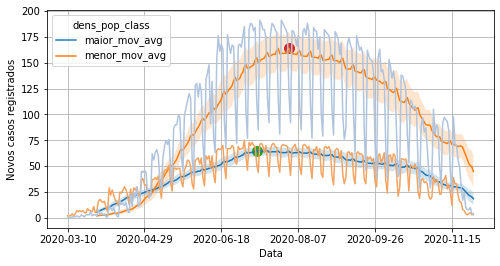

In [65]:
colors = ['sandybrown', 'lightsteelblue']

axes = dffinal.plot(kind='line', y= mov_avg_columns, figsize=(8,4))

for col, c in zip(columns, colors) :
    axes.plot(dffinal.reset_index()['extractDate'], dffinal[col], color = c)
    
for under, over in zip(under_columns, over_columns):
    plt.fill_between(dffinal.reset_index()['extractDate'], dffinal[under], dffinal[over], alpha=.2)

plt.scatter(x = dffinal.iloc[dffinal['maior_mov_avg'].argmax()].name, y = dffinal.iloc[dffinal['maior_mov_avg'].argmax()]['maior_mov_avg'], s=100)
plt.scatter(x = dffinal.iloc[dffinal['menor_mov_avg'].argmax()].name, y = dffinal.iloc[dffinal['menor_mov_avg'].argmax()]['menor_mov_avg'], s=100)
plt.grid()
plt.xlabel("Data")
plt.ylabel("Novos casos registrados")
plt.savefig(f'{PATH_FIGURAS}densidade_populacional.png', bbox_inches = 'tight', pad_inches = 0)

In [66]:
print("**"*20)
print(f"Dia de mais número de casos ao agrupar os municipios por maior densidade populacional : {dffinal.iloc[dffinal['maior'].argmax()].name} com : {dffinal.iloc[dffinal['maior'].argmax()]['maior']} casos")
print("**"*20)
print(f"Dia de mais número de casos ao agrupar os municipios por menor densidade populacional : {dffinal.iloc[dffinal['menor'].argmax()].name} com : {dffinal.iloc[dffinal['menor'].argmax()]['menor']} casos")
print("**"*20)

****************************************
Dia de mais número de casos ao agrupar os municipios por maior densidade populacional : 2020-07-03 com : 75.0 casos
****************************************
Dia de mais número de casos ao agrupar os municipios por menor densidade populacional : 2020-07-13 com : 191.0 casos
****************************************


In [67]:
x = dffinal['maior_mov_avg'].diff()
y = pd.to_datetime(dffinal.reset_index()['extractDate'])
y = y.diff()
y = y.to_numpy()
# y.to

/home/german.salazar/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


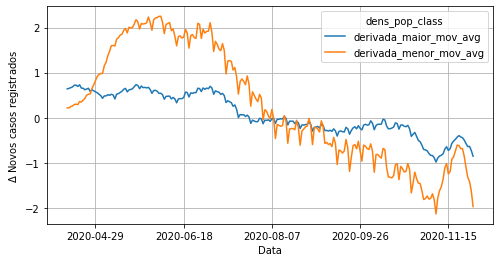

In [68]:
dffinal['x_menor'] = dffinal['menor_mov_avg'].diff()
dffinal['x_maior'] = dffinal['maior_mov_avg'].diff()
dffinal = dffinal.reset_index()
dffinal['tempo'] = pd.to_datetime(dffinal['extractDate'])

n_step = 15
dffinal['y'] = dffinal['tempo'] .diff()
dffinal['y'] = dffinal['y'].to_numpy()
dffinal['y'] = dffinal['y'].astype('timedelta64[D]')# / np.timedelta64(1, 'D')
# dffinal['y'] = dffinal['y']/np.timedelta64(1, 'D')
dffinal['derivada_menor'] = dffinal['x_menor'].div(dffinal['y'] )
dffinal['derivada_maior'] = dffinal['x_maior'].div(dffinal['y'] )
dffinal['derivada_maior_mov_avg'] = dffinal['derivada_maior'].rolling(window=n_step).mean()
dffinal['derivada_menor_mov_avg'] = dffinal['derivada_menor'].rolling(window=n_step).mean()

dffinal.plot(kind = 'line', x= 'extractDate', y = ['derivada_maior_mov_avg', 'derivada_menor_mov_avg'], figsize=(8,4))
plt.grid()
plt.xlabel("Data")
plt.ylabel(r"$\Delta$ Novos casos registrados")
plt.savefig(f'{PATH_FIGURAS}densidade_populacional_der1.png', bbox_inches = 'tight', pad_inches = 0)
# plt.plot(tempo, derivada)
# plt.plot(tempo, derivada)

/home/german.salazar/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


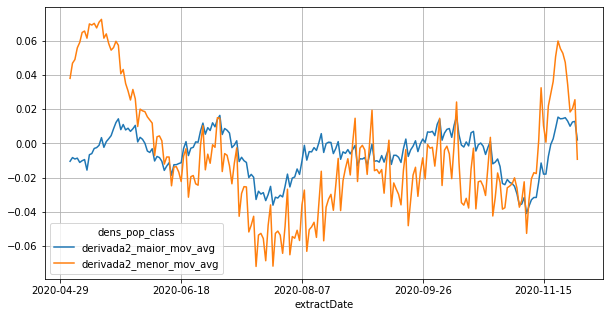

In [19]:
dffinal['x2_menor'] = dffinal['derivada_menor_mov_avg'].diff()
dffinal['x2_maior'] = dffinal['derivada_maior_mov_avg'].diff()
dffinal['tempo'] = pd.to_datetime(dffinal.reset_index()['extractDate'])

n_step = 20
dffinal['y'] = dffinal['tempo'] .diff()
dffinal['y'] = dffinal['y'].to_numpy()
dffinal['y'] = dffinal['y'].astype('timedelta64[D]')# / np.timedelta64(1, 'D')
# dffinal['y'] = dffinal['y']/np.timedelta64(1, 'D')
dffinal['derivada2_menor'] = dffinal['x2_menor'].div(dffinal['y'] )
dffinal['derivada2_maior'] = dffinal['x2_maior'].div(dffinal['y'] )
dffinal['derivada2_maior_mov_avg'] = dffinal['derivada2_maior'].rolling(window=n_step).mean()
dffinal['derivada2_menor_mov_avg'] = dffinal['derivada2_menor'].rolling(window=n_step).mean()

dffinal.plot(kind = 'line', x= 'extractDate', y = ['derivada2_maior_mov_avg', 'derivada2_menor_mov_avg'], figsize=(10,5))
plt.grid()
# plt.plot(tempo, derivada)
# plt.plot(tempo, derivada)